In [1]:
#Import Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
%matplotlib inline

# Custom Function and Transformers

In [2]:
#Function to Import Data

def import_data(path, drop, sep,dropna=True, drop_duplicates=True):
    data = pd.read_csv(path, sep)
    print("Banyaknya baris dan kolom", data.shape)
    print("Banyaknya data duplicate", data.duplicated().sum())
    data = data.drop_duplicates() if drop_duplicates else data
    data = data.dropna() if dropna else data
    data = data.drop(drop,axis=1)
    print("Banyaknya data setelah di drop", data.shape)
    #print(data.head())
    return data

In [3]:
#Function to Extract Input and Output

def extract_input_output(data, output):
    y = data[output]
    x = data.drop(output, axis=1)
    #print(x.columns) #optional
    #print(y.head()) #optional
    return x,y

In [4]:
#function to split train test data (default test_size = 0.5)
from sklearn.model_selection import train_test_split

def train_test_data(x,y, _test_size = 0.2): 
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =_test_size,
                                                        random_state =100)
   # print(x_train.head(), y_train.head()) #
    #print(x_test.head(), y_test.head()) #
    return x_train, x_test, y_train, y_test

In [5]:
#Function to evaluate score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

def scoring(model) :
    y_predict = model.predict(x_train)
    print("Model Score based on training data")
    print("Accuracy : %s" % (accuracy_score(y_train, y_predict)))
    print("Recall : %s" % (recall_score(y_train, y_predict)))
    y_predict = model.predict(x_test)
    print("Model Score based on test data")
    print("Accuracy : %s" % (accuracy_score(y_test, y_predict)))
    print("Recall : %s" % (accuracy_score(y_test, y_predict)))    


In [6]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

# Visualization Functions

In [8]:
#Make sure y_train is balanced
def plot_y_balance(y, df) : 
  ax = sns.countplot(y,label="Count")       # M = 212, B = 357
  C, N = y.value_counts()
  print('Number of Churned: ',C)
  print('Number of Not Churned : ',N) 
  df.isChurned.value_counts(normalize=True)

# START TRAINING

## Import

In [9]:
df = import_data('Datasets/df_mobile_merged.csv', [],',')

Banyaknya baris dan kolom (1758936, 13)
Banyaknya data duplicate 0
Banyaknya data setelah di drop (1758936, 13)


In [10]:
df.head()

Unnamed: 0  userId  num_of_order  total_invoice  max_invoice  min_invoice  \
0           0  401864             1        10700.0      10700.0      10700.0   
1          18  401864            53      2942150.0    2059600.0    2059600.0   
2          36  401864            50      2428710.0    1903910.0    1903910.0   
3          54  401864            62      3559950.0    3033650.0    3033650.0   
4          72  401864            39      2025650.0    1740700.0    1740700.0   

    avg_invoice  total_price  max_price  min_price     avg_price  isChurned  \
0  10700.000000      10700.0    10700.0    10700.0  10700.000000          1   
1  51490.000000    2942150.0  2059600.0  2059600.0  51490.000000          0   
2  45331.190476    2428710.0  1903910.0  1903910.0  45331.190476          0   
3  58339.423077    3559950.0  3033650.0  3033650.0  58339.423077          0   
4  54396.875000    2025650.0  1740700.0  1740700.0  54396.875000          0   

   userLevel  
0        2.0  
1        2.0  
2        2.0  
3        2.0  
4        2.0

In [11]:
to_drop = ['Unnamed: 0',"userId"]
df = df.drop(to_drop, axis=1)

In [12]:
df.head()

num_of_order  total_invoice  max_invoice  min_invoice   avg_invoice  \
0             1        10700.0      10700.0      10700.0  10700.000000   
1            53      2942150.0    2059600.0    2059600.0  51490.000000   
2            50      2428710.0    1903910.0    1903910.0  45331.190476   
3            62      3559950.0    3033650.0    3033650.0  58339.423077   
4            39      2025650.0    1740700.0    1740700.0  54396.875000   

   total_price  max_price  min_price     avg_price  isChurned  userLevel  
0      10700.0    10700.0    10700.0  10700.000000          1        2.0  
1    2942150.0  2059600.0  2059600.0  51490.000000          0        2.0  
2    2428710.0  1903910.0  1903910.0  45331.190476          0        2.0  
3    3559950.0  3033650.0  3033650.0  58339.423077          0        2.0  
4    2025650.0  1740700.0  1740700.0  54396.875000          0        2.0

In [13]:
from sklearn.utils import shuffle
df = shuffle(df)

## Outlier Removal

Outliers are defined as users with numbr of orders >= 6000

In [14]:
df.drop(df.loc[df['num_of_order']>=6000].index, inplace=True)

In [15]:
# from sklearn.utils import shuffle

## Pre-processing and Machine Learning Test

Dropping user Id from pre processing

In [16]:

#Extract input output
x, y = extract_input_output(df,'isChurned')
print(x.shape)
print(y.shape)

#Split train and test
x_train, x_test, y_train, y_test = train_test_data(x,y)

(1758933, 10)
(1758933,)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import FeatureUnion

num_attribs = list(x_train)
cat_attribs = ["userLevel"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    #('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
  ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
  ])

preprocessor = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
  ])

/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Test Machine Learning Algorithms

In [18]:
# ?Pipeline

In [35]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('processor', preprocessor), #Step1 - preprocess data
    ('clf', LogisticRegression()) #step2 - classifier (default : LogisticRegression )
])

from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
# clfs.append(SVC())
# clfs.append(KNeighborsClassifier(n_neighbors=3))
# clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier(n_estimators =100, max_features=0.7, max_depth=5))
# clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, x_train, y_train,cv=3)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())



/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------
fit_time  mean  11.266092777252197
fit_time  std  0.9272973988418743
score_time  mean  0.18509380022684732
score_time  std  0.0010209911350390602
test_score  mean  0.7207752416192754
test_score  std  0.0007851107803683682
---------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_esti

## Saving the Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

pipeline = Pipeline([
    ('processor', preprocessor), #Step1 - preprocess data
    ('clf', RandomForestClassifier()) #step2 - classifier (default : LogisticRegression )
])
pipeline.set_params(clf = classifier)

model = pipeline.fit(x_train,y_train)

scoring(model)

Model Score based on training data
Accuracy : 0.7619451002241416
Recall : 0.5014852627595056
Model Score based on test data
Accuracy : 0.7620435092826057
Recall : 0.7620435092826057


In [38]:
# View the predicted probabilities of the first 10 observations
model.predict_proba(x_test) 

array([[0.65559947, 0.34440053],
       [0.6956541 , 0.3043459 ],
       [0.64543543, 0.35456457],
       ...,
       [0.42899905, 0.57100095],
       [0.59515209, 0.40484791],
       [0.39618344, 0.60381656]])

## Pipeline for test data

In [27]:
pipeline.predict_proba(x_test)

array([[0.67760231, 0.32239769],
       [0.77507219, 0.22492781],
       [0.42831012, 0.57168988],
       ...,
       [0.63803444, 0.36196556],
       [0.71991187, 0.28008813],
       [0.85550079, 0.14449921]])

In [28]:
num_attribs = list(x_test)

## Creating pickle model

In [27]:
import mlflow.sklearn
import mlflow
from sklearn.datasets import load_iris
from sklearn import tree
import pickle
# mlflow.set_tracking_uri()
default_path = '/Garda'

pickle.dump( model, open( "Garda/churn_v2.pkl", "wb" ) )
#Save the model in pickle format
#set path to location for persistence
# sk_path_dir_2 ="Churn_models_pickle/"
# mlflow.sklearn.save_model(model, path=default_path+'/churn_v2.pkl', serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_PICKLE)

In [44]:
mlflow.sklearn.save_model(pipeline, path='/churn_pipeline', serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_PICKLE)

PermissionError: [Errno 13] Permission denied: '/churn_pipeline'

## Run by loading the pickle

In [44]:
load_models = mlflow.sklearn.load_model(default_path+'/churn_moddl')
load_pipeline = mlflow.sklearn.load_model(default_path+'/churn_pipeline')

In [45]:
load_models.predict_proba(x_test) 

array([[0.65559947, 0.34440053],
       [0.6956541 , 0.3043459 ],
       [0.64543543, 0.35456457],
       ...,
       [0.42899905, 0.57100095],
       [0.59515209, 0.40484791],
       [0.39618344, 0.60381656]])

In [46]:
load_pipeline.predict_proba(x_test)

array([[0.65559947, 0.34440053],
       [0.6956541 , 0.3043459 ],
       [0.64543543, 0.35456457],
       ...,
       [0.42899905, 0.57100095],
       [0.59515209, 0.40484791],
       [0.39618344, 0.60381656]])

# END TRAINING

## Churn vs not churn distribution

In [86]:
x, y = extract_input_output(df_merged, "isChurned")

In [87]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
C, N = y.value_counts()
print('Number of Churned: ',C)
print('Number of Not Churned : ',N) 
df.isChurned.value_counts(normalize=True)

Number of Churned:  1081794
Number of Not Churned :  677139


0    0.587791
1    0.412209
Name: isChurned, dtype: float64

In [88]:
x_train, x_test, y_train, y_test = train_test_data(x,y)

In [89]:
print (" Ukuran data training {}, data testing {}".format(x_train.shape, x_test.shape))

Ukuran data training (1407146, 10), data testing (351787, 10)


In [90]:
x_train.isnull().sum()

num_of_order     0
total_invoice    0
max_invoice      0
min_invoice      0
avg_invoice      0
total_price      0
max_price        0
min_price        0
avg_price        0
userLevel        0
dtype: int64

## Experiment 1 : Baseline 

### Normalisasi atribut pada data training

In [92]:

#Extract input output
x, y = extract_input_output(df_merged,'isChurned')
print(x.shape)
print(y.shape)

#Split train and test
x_train, x_test, y_train, y_test = train_test_data(x,y)

(1758933, 10)
(1758933,)


In [93]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
for col in x_train.columns[:]: #melakukan normalisasi pada semua atribut
    x_train[col] = scaler.fit_transform(np.array(x_train[col]).reshape(-1,1));
   


/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [94]:
x_train.head()

num_of_order  total_invoice  max_invoice  min_invoice  avg_invoice  \
12988060     -0.430341      -0.365901    -0.515263    -0.515228     0.116194   
488424       -0.189196      -0.253688    -0.312148    -0.312035    -0.294652   
9078386      -0.430341      -0.378859    -0.539972    -0.539946    -0.556148   
7741037      -0.338476      -0.335843    -0.464160    -0.464105    -0.329252   
12575352     -0.407375      -0.320572    -0.428826    -0.428757     0.428371   

          total_price  max_price  min_price  avg_price  userLevel  
12988060    -0.366303  -0.515730  -0.515730   0.115631  -0.806170  
488424      -0.254139  -0.312702  -0.312699  -0.295528  -0.806170  
9078386     -0.379252  -0.540423  -0.540424  -0.557083   1.131467  
7741037     -0.335640  -0.463472  -0.463472  -0.326149   1.131467  
12575352    -0.320994  -0.429329  -0.429329   0.428047  -0.806170

In [95]:
for col in x_test.columns[:]: #melakukan normalisasi pada semua atribut
    x_test[col] = scaler.fit_transform(np.array(x_test[col]).reshape(-1,1))

/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [96]:
x_test.head()

num_of_order  total_invoice  max_invoice  min_invoice  avg_invoice  \
11666034      0.144146       6.651167     6.945734     6.948590     5.599877   
2052177      -0.353604      -0.317336    -0.425401    -0.425328    -0.202521   
6099745       1.394310       1.046853     1.314995     1.313385    -0.112250   
7609719      -0.237849      -0.232480    -0.263084    -0.262949    -0.171205   
12995360     -0.434634      -0.350004    -0.487891    -0.487842     0.798188   

          total_price  max_price  min_price  avg_price  userLevel  
11666034     6.647758   6.942083   6.942185   5.600489  -0.807640  
2052177     -0.317632  -0.425658  -0.425657  -0.202398   1.126472  
6099745      1.054567   1.322641   1.322666  -0.110263   1.126472  
7609719     -0.232938  -0.263652  -0.263648  -0.171899   1.126472  
12995360    -0.350413  -0.488363  -0.488363   0.797713  -0.807640

### Logistic Regression, Random Forest Classifier, dan Ada Boost Classifier

#### Logistic Regression Normal

In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
#Tried @ 5om
scoring(logreg)

Model Score based on training data
Accuracy : 0.721661433852635
Recall : 0.63084076797461
Model Score based on test data
Accuracy : 0.7215388857462044
Recall : 0.7215388857462044


#### Logistic Regression Cross-Val

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import FeatureUnion

num_attribs = list(x_train)
# cat_attribs = ["userLevel"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    #('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
  ])

# cat_pipeline = Pipeline([
#     ('selector', DataFrameSelector(cat_attribs)),
#      ('label_binarizer', MyLabelBinarizer()),
#   ])

preprocessor = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
#     ("cat_pipeline", cat_pipeline),
  ])

In [100]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('processor', preprocessor), #Step1 - preprocess data
    ('clf', LogisticRegression()) #step2 - classifier (default : LogisticRegression )
])

from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
# clfs.append(SVC())
# clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
# clfs.append(RandomForestClassifier())
# clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, x_train, y_train,cv=3, scoring="recall")
    scores_test = cross_validate(pipeline, x_test, y_test,cv=3, scoring="recall")
    print('---------------------------------')
    print(str(classifier))
    print('---------------Recall------------')
    for key, values in scores.items():
        print(key,' mean ', values.mean())
        print(key,' std ', values.std())
        scores = cross_validate(pipeline, x_train, y_train,cv=3, scoring="recall")

    print('-----------------------------------')
    for key, values in scores.items():
        print(key,' mean ', values.mean())
        print(key,' std ', values.std())

/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
---------------Recall------------
fit_time  mean  9.016132672627768
fit_time  std  0.37255523556108905


/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score_time  mean  0.2403583526611328
score_time  std  0.003739563702465179


/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


test_score  mean  0.6318593219239327
test_score  std  0.0005599164248293575


/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-----------------------------------
fit_time  mean  9.146957556406656
fit_time  std  0.546624429920679
score_time  mean  0.24200264612833658
score_time  std  0.0032449132538261336
test_score  mean  0.6318593219239327
test_score  std  0.0005599164248293575
---------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
---------------Recall------------
fit_time  mean  32.126265128453575
fit_time  std  0.4512120210076486
score_time  mean  0.4803617000579834
score_time  std  0.0060678712718374795
test_score  mean  0.6130363801853754
test_score  std  0.001975828737456387
-----------------------------------
fit_time  mean 

#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(x_train, y_train)

/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
 print("Accuracy:",clf.score(x_test, y_test)) # akurasi

Accuracy: 0.737926643110746


#### Predicted Probabilities of the first 10 observations

In [24]:
# View the predicted probabilities of the first 10 observations
model.predict_proba(x_test)

array([[0.67760231, 0.32239769],
       [0.77507219, 0.22492781],
       [0.42831012, 0.57168988],
       ...,
       [0.63803444, 0.36196556],
       [0.71991187, 0.28008813],
       [0.85550079, 0.14449921]])

#### View a list of the features and their importance scores

In [ ]:
list(zip(x_train, clf.feature_importances_))

In [ ]:
importance = list(clf.feature_importances_)
features = list(x_train.columns.values)



In [ ]:
d = {'features':features, 'importance': importance}
df_importance = pd.DataFrame(data=d)


In [ ]:
df_importance.plot(kind='bar',x='features',y='importance')

#### Ada Boost Classifier

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Create adaboost classifer object
abc = AdaBoostClassifier()
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
prediction = model.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

### Feature Engineering

In [102]:
import numpy as np

X_train = x_train
X_train = np.append (arr=np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)

In [103]:
!pip install scipy==1.3 --upgrade


Requirement already up-to-date: scipy==1.3 in /home/ubuntu/miniconda3/lib/python3.7/site-packages (1.3.0)


In [106]:
import statsmodels.formula.api as sm
X_opt = [0,1,2,3,4,5,6]
regressor = sm.OLS(y_train_without_zero, X_train[:,X_opt]).fit()
print(regressor.summary())

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

Removing quasi constant features (features that are almost constant. In other words, these features have the same values for a very large subset of the outputs)

In [146]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import VarianceThreshold

qconstant_filter = VarianceThreshold(threshold=0.01) 

In [147]:
train_features, test_features, train_labels, test_labels=train_test_split(  
    df.drop(labels=['isChurned'], axis=1),
    df['isChurned'],
    test_size=0.2,
    random_state=41)

In [148]:
qconstant_filter.fit(train_features) 

VarianceThreshold(threshold=0.01)

In [149]:
len(train_features.columns[qconstant_filter.get_support()])

9

In [151]:
correlated_features = set()  
correlation_matrix = df.corr() 

In [152]:
for i in range(len(correlation_matrix .columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [153]:
len(correlated_features) 

7

In [154]:
print(correlated_features) 

{'max_price', 'min_price', 'total_invoice', 'max_invoice', 'min_invoice', 'total_price', 'avg_price'}


#### Recursive Feature Elimination

In [156]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [157]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

NameError: name 'RFE' is not defined

# Test on Electricity Data with mobile Model

In [53]:
df_elec = import_data("df_elec_churn.csv",[],',')

Banyaknya baris dan kolom (1105668, 17)
Banyaknya data duplicate 0
Banyaknya data setelah di drop (1105667, 17)


In [54]:
df_elec.head()

Unnamed: 0  user_id  month  year product_type  num_of_order  total_invoice  \
0     4946800        1      1  2018  electricity             1        50000.0   
1     4431609        1      2  2018  electricity             5       446954.0   
2     3863378        1      3  2018  electricity             3       219846.0   
3     2681407        1      5  2017  electricity             1        50500.0   
4     2097978        1      6  2017  electricity             1        50500.0   

   max_invoice  min_invoice  avg_invoice  total_price  max_price  min_price  \
0      50000.0      50000.0      50000.0      50050.0    50050.0    50050.0   
1     446954.0     446954.0      89390.8     447500.0   447500.0   447500.0   
2     219846.0     219846.0      73282.0     219050.0   219050.0   219050.0   
3      50500.0      50500.0      50500.0      50500.0    50500.0    50500.0   
4      50500.0      50500.0      50500.0      50500.0    50500.0    50500.0   

      avg_price  month_s  user_id_s  isChurned  
0  50050.000000      2.0        1.0          0  
1  89500.000000      3.0        1.0          0  
2  73016.666667      4.0        1.0          0  
3  50500.000000      6.0        1.0          0  
4  50500.000000      7.0        1.0          0

In [55]:
to_drop = ['Unnamed: 0', 'month', 'year',"product_type","user_id_s","month_s"]
df_elec = df_elec.drop(to_drop, axis=1)

In [56]:
df_elec.shape

(1105667, 11)

In [69]:
df_elec.head()

user_id  num_of_order  total_invoice  max_invoice  min_invoice  \
0        1             1        50000.0      50000.0      50000.0   
1        1             5       446954.0     446954.0     446954.0   
2        1             3       219846.0     219846.0     219846.0   
3        1             1        50500.0      50500.0      50500.0   
4        1             1        50500.0      50500.0      50500.0   

   avg_invoice  total_price  max_price  min_price     avg_price  isChurned  
0      50000.0      50050.0    50050.0    50050.0  50050.000000          0  
1      89390.8     447500.0   447500.0   447500.0  89500.000000          0  
2      73282.0     219050.0   219050.0   219050.0  73016.666667          0  
3      50500.0      50500.0    50500.0    50500.0  50500.000000          0  
4      50500.0      50500.0    50500.0    50500.0  50500.000000          0

## Menambhkan User Level

In [70]:
df.head()

userId  num_of_order  total_invoice  max_invoice  min_invoice  avg_invoice  \
0       1             1        50000.0      50000.0      50000.0      50000.0   
1       1             5       446954.0     446954.0     446954.0      89390.8   
2       1             3       219846.0     219846.0     219846.0      73282.0   
3       1             1        50500.0      50500.0      50500.0      50500.0   
4       1             1        50500.0      50500.0      50500.0      50500.0   

   total_price  max_price  min_price     avg_price  isChurned  
0      50050.0    50050.0    50050.0  50050.000000          0  
1     447500.0   447500.0   447500.0  89500.000000          0  
2     219050.0   219050.0   219050.0  73016.666667          0  
3      50500.0    50500.0    50500.0  50500.000000          0  
4      50500.0    50500.0    50500.0  50500.000000          0

In [66]:
df = df_elec

In [67]:
df = df.rename(columns={'user_id': 'userId'})

In [74]:
df_2 = import_data("Datasets/merged_churn.csv",[],'|')

/home/ubuntu/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Banyaknya baris dan kolom (1902947, 27)
Banyaknya data duplicate 0
Banyaknya data setelah di drop (1902909, 27)


In [75]:
df = df.reset_index(drop=True)
df_2 = df_2.reset_index(drop=True)

In [76]:
df_2.head()

userId  date_trunc  num_recharge_trx  average_recharge_trx  \
0       1  2019-01-01                12          17787.500000   
1  361243  2019-01-01                 3         105350.000000   
2  361249  2019-01-01                 7         135132.714286   
3  361255  2019-01-01                15          57833.333333   
4  361264  2019-01-01                84          35905.654762   

   max_recharge_trx  min_recharge_trx  num_topup_trx  average_topup_trx  \
0           80000.0            5300.0              1       1.033000e+05   
1          211000.0           29950.0              1       2.502280e+05   
2          297000.0           40600.0              8       4.243750e+06   
3          115250.0           10100.0              3       1.836077e+05   
4          200300.0            5500.0              3       1.333425e+06   

   max_topup_trx  min_topup_trx  ...  isChurned  isActive  isVerifiedPhone  \
0       103300.0       103300.0  ...          1       1.0              0.0   
1       250228.0       250228.0  ...          1       1.0              1.0   
2      9500000.0       500000.0  ...          1       1.0              1.0   
3       250240.0       100368.0  ...          1       1.0              1.0   
4      1500056.0      1000173.0  ...          1       1.0              1.0   

   isVerifiedEmail  isUpgradedUser  blocked premium  super  userLevel  \
0              0.0             0.0      0.0    True   True        3.0   
1              0.0             0.0      0.0    True  False        2.0   
2              1.0             0.0      0.0    True  False        3.0   
3              1.0             0.0      0.0    True  False        2.0   
4              0.0             0.0      0.0    True  False        2.0   

   pinEnabled  
0        True  
1        True  
2        True  
3        True  
4        True  

[5 rows x 27 columns]

In [77]:
merged_inner = pd.merge(left=df,right=df_2, left_on='userId', right_on='userId')

MemoryError: 

In [79]:
df.shape #sales_daily

(1105667, 11)

In [80]:
df_2.shape #churn_merged

(1902909, 2)

In [81]:
df_merged = merged_inner.drop_duplicates()

In [82]:
df_merged.head()

userId  num_of_order  total_invoice  max_invoice  min_invoice  \
0         1             1        50000.0      50000.0      50000.0   
32        1             5       446954.0     446954.0     446954.0   
64        1             3       219846.0     219846.0     219846.0   
96        1             1        50500.0      50500.0      50500.0   
160       1             1        51005.0      51005.0      51005.0   

     avg_invoice  total_price  max_price  min_price     avg_price  isChurned  \
0        50000.0      50050.0    50050.0    50050.0  50050.000000          0   
32       89390.8     447500.0   447500.0   447500.0  89500.000000          0   
64       73282.0     219050.0   219050.0   219050.0  73016.666667          0   
96       50500.0      50500.0    50500.0    50500.0  50500.000000          0   
160      51005.0      50500.0    50500.0    50500.0  50500.000000          0   

     userLevel  
0          3.0  
32         3.0  
64         3.0  
96         3.0  
160        3.0

In [83]:
x, y = extract_input_output(df_merged, "isChurned")

In [89]:
x = x.drop(["userId"],axis=1)

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

prediction = lr.predict(x)
print (accuracy_score(y,prediction))
print (recall_score(y,prediction))



0.6812206107063561
0.6483645716240652


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import FeatureUnion

num_attribs = list(x)
cat_attribs = ["userLevel"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    #('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
  ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
  ])

preprocessor = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
  ])

# Menambahkan UserLevel (Not Run)

In [14]:
df.nunique()

user_id          636436
num_of_order       1913
total_invoice    488706
max_invoice      457729
min_invoice      457791
avg_invoice      803509
total_price      322499
max_price        294433
min_price        294405
avg_price        656943
isChurned             2
dtype: int64

In [15]:
df = df.rename(columns={'user_id': 'userId'})

In [16]:
df_2 = df_2.drop(df_2.columns[1:16], axis = 1)

In [17]:
df_2.head()

userId  userLevel
0       1        3.0
1  361243        2.0
2  361249        3.0
3  361255        2.0
4  361264        2.0

In [18]:
df = df.reset_index(drop=True)
df_2 = df_2.reset_index(drop=True)

In [19]:
merged_inner = pd.merge(left=df,right=df_2, left_on='userId', right_on='userId')

In [23]:
df.shape #sales_daily

(2014270, 11)

In [25]:
df_2.shape #churn_merged

(1902909, 2)

In [27]:
df_merged = merged_inner.drop_duplicates()

In [29]:
df_merged.head()

userId  num_of_order  total_invoice  max_invoice  min_invoice  \
0   401864             1        10700.0      10700.0      10700.0   
18  401864            53      2942150.0    2059600.0    2059600.0   
36  401864            50      2428710.0    1903910.0    1903910.0   
54  401864            62      3559950.0    3033650.0    3033650.0   
72  401864            39      2025650.0    1740700.0    1740700.0   

     avg_invoice  total_price  max_price  min_price     avg_price  isChurned  \
0   10700.000000      10700.0    10700.0    10700.0  10700.000000          1   
18  51490.000000    2942150.0  2059600.0  2059600.0  51490.000000          0   
36  45331.190476    2428710.0  1903910.0  1903910.0  45331.190476          0   
54  58339.423077    3559950.0  3033650.0  3033650.0  58339.423077          0   
72  54396.875000    2025650.0  1740700.0  1740700.0  54396.875000          0   

    userLevel  
0         2.0  
18        2.0  
36        2.0  
54        2.0  
72        2.0

In [30]:
df_merged.userLevel.value_counts()

1.0    1047286
2.0     690946
3.0      20704
Name: userLevel, dtype: int64

In [31]:
df_merged.to_csv("Datasets/df_mobile_merged.csv")

# Outlier Detection (Not Run)

## Outlier Detection
num_of_order	total_invoice	max_invoice	min_invoice	avg_invoice	total_price	max_price	min_price	avg_price

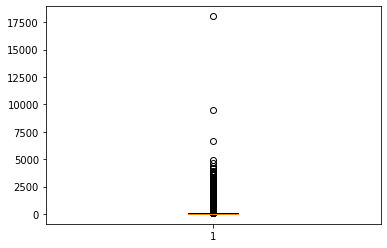

In [65]:
plt.boxplot(df_merged['num_of_order']);

In [67]:
df_merged["userId"].loc[df_merged['num_of_order'] > 6000]

2155266     418798
5416443    1457633
5416447    1457633
Name: userId, dtype: int64

These users has been proven fraud and have been blocked

In [37]:
df_merged.drop(df_merged.loc[df_merged['num_of_order']>=6000].index, inplace=True)

In [38]:
df_merged.loc[df_merged["num_of_order"]> 6000]

Empty DataFrame
Columns: [num_of_order, total_invoice, max_invoice, min_invoice, avg_invoice, total_price, max_price, min_price, avg_price, isChurned, userLevel]
Index: []

In [39]:
plt.boxplot(df_merged['num_of_order']);

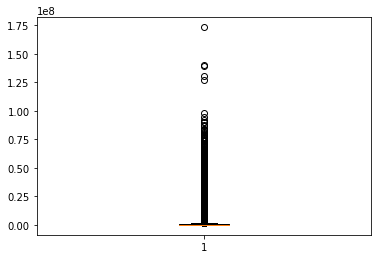

In [40]:
plt.boxplot(df_merged['total_invoice']);

In [41]:
plt.boxplot(df_merged['max_invoice']);

In [42]:
plt.boxplot(df_merged['min_invoice']);

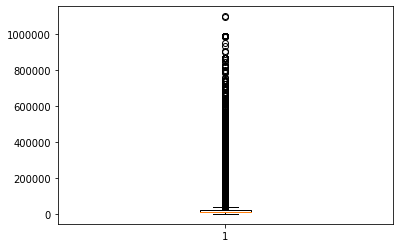

In [43]:
plt.boxplot(df_merged['avg_invoice']);

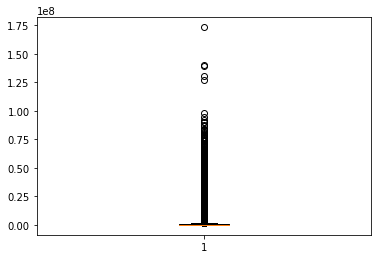

In [44]:
plt.boxplot(df_merged['total_price']);

In [45]:
plt.boxplot(df_merged['max_price']);

In [46]:
plt.boxplot(df_merged['min_price']);

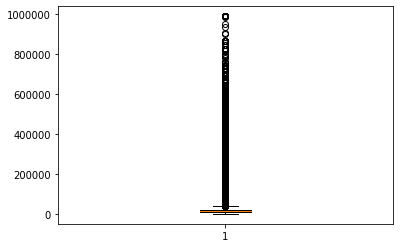

In [47]:
plt.boxplot(df_merged['avg_price']);